In [1]:
# import the libraries

import numpy as np
import pandas as pd
from eofs.standard import Eof
from netCDF4 import Dataset
import matplotlib.pyplot as plt
import cartopy.crs as ccrs

In [2]:
# Load the NetCDF file
nc_file = 'sst_dataset.nc'  
nc_data = Dataset(nc_file, 'r')
nc_data

<class 'netCDF4._netCDF4.Dataset'>
root group (NETCDF3_64BIT_OFFSET data model, file format NETCDF3):
    Conventions: CF-1.6
    history: 2024-04-07 15:52:22 GMT by grib_to_netcdf-2.25.1: /opt/ecmwf/mars-client/bin/grib_to_netcdf.bin -S param -o /cache/data9/adaptor.mars.internal-1712505109.8760552-19873-10-347f30a9-0bea-48e0-abe8-25e73dbf6c1b.nc /cache/tmp/347f30a9-0bea-48e0-abe8-25e73dbf6c1b-adaptor.mars.internal-1712504911.5802283-19873-14-tmp.grib
    dimensions(sizes): longitude(1440), latitude(721), time(840)
    variables(dimensions): float32 longitude(longitude), float32 latitude(latitude), int32 time(time), int16 sst(time, latitude, longitude)
    groups: 

In [3]:
sst = nc_data.variables['sst'][:]

# Reshape the data to be 2-dimensional (time, space)
nt, nx, ny = sst.shape
sst_2d = np.reshape(sst, (nt, nx * ny))
sst_2d

masked_array(
  data=[[283.12809002760895, 283.12809002760895, 283.12809002760895, ...,
         --, --, --],
        [281.6794465781732, 281.6794465781732, 281.6794465781732, ...,
         --, --, --],
        [284.57611466309794, 284.57611466309794, 284.57611466309794, ...,
         --, --, --],
        ...,
        [271.4597342469336, 271.4597342469336, 271.4597342469336, ...,
         --, --, --],
        [271.4597342469336, 271.4597342469336, 271.4597342469336, ...,
         --, --, --],
        [271.4603530608804, 271.4603530608804, 271.4603530608804, ...,
         --, --, --]],
  mask=[[False, False, False, ...,  True,  True,  True],
        [False, False, False, ...,  True,  True,  True],
        [False, False, False, ...,  True,  True,  True],
        ...,
        [False, False, False, ...,  True,  True,  True],
        [False, False, False, ...,  True,  True,  True],
        [False, False, False, ...,  True,  True,  True]],
  fill_value=-32767)

In [4]:
sst.shape #shape of sst variable as 3d array 

(840, 721, 1440)

In [5]:
sst_2d.shape #shape of sst variable as 2d array 

(840, 1038240)

In [6]:
# Standardize the dataset

from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
standardized_sst = scaler.fit_transform(sst_2d)
standardized_sst

array([[ 1.02346828,  1.02346828,  1.02346828, ...,  0.        ,
         0.        ,  0.        ],
       [ 0.78922391,  0.78922391,  0.78922391, ...,  0.        ,
         0.        ,  0.        ],
       [ 1.25761259,  1.25761259,  1.25761259, ...,  0.        ,
         0.        ,  0.        ],
       ...,
       [-0.86329456, -0.86329456, -0.86329456, ...,  0.        ,
         0.        ,  0.        ],
       [-0.86329456, -0.86329456, -0.86329456, ...,  0.        ,
         0.        ,  0.        ],
       [-0.8631945 , -0.8631945 , -0.8631945 , ...,  0.        ,
         0.        ,  0.        ]])

In [7]:
standardized_sst.shape #shape of 2d array after standardization

(840, 1038240)

In [8]:
# Perform EOF analysis
solver = Eof(standardized_sst[600:,:]) #performing eof for the last 20 years due to memory error constraint
eofs = solver.eofs()
pcs = solver.pcs()
variance_fractions = solver.varianceFraction()
lambdas = solver.eigenvalues()

# Print the explained variance by each EOF mode
print("Explained variance by each EOF mode:")
for i, variance_fraction in enumerate(variance_fractions):
    print("EOF mode {}: {:.2f}%".format(i+1, variance_fraction * 100))

Explained variance by each EOF mode:
EOF mode 1: 84.13%
EOF mode 2: 2.98%
EOF mode 3: 2.01%
EOF mode 4: 1.11%
EOF mode 5: 0.86%
EOF mode 6: 0.60%
EOF mode 7: 0.55%
EOF mode 8: 0.43%
EOF mode 9: 0.39%
EOF mode 10: 0.29%
EOF mode 11: 0.29%
EOF mode 12: 0.27%
EOF mode 13: 0.24%
EOF mode 14: 0.22%
EOF mode 15: 0.21%
EOF mode 16: 0.18%
EOF mode 17: 0.15%
EOF mode 18: 0.15%
EOF mode 19: 0.15%
EOF mode 20: 0.14%
EOF mode 21: 0.13%
EOF mode 22: 0.12%
EOF mode 23: 0.12%
EOF mode 24: 0.11%
EOF mode 25: 0.11%
EOF mode 26: 0.10%
EOF mode 27: 0.10%
EOF mode 28: 0.10%
EOF mode 29: 0.09%
EOF mode 30: 0.08%
EOF mode 31: 0.08%
EOF mode 32: 0.08%
EOF mode 33: 0.08%
EOF mode 34: 0.08%
EOF mode 35: 0.07%
EOF mode 36: 0.07%
EOF mode 37: 0.07%
EOF mode 38: 0.07%
EOF mode 39: 0.06%
EOF mode 40: 0.06%
EOF mode 41: 0.06%
EOF mode 42: 0.06%
EOF mode 43: 0.06%
EOF mode 44: 0.06%
EOF mode 45: 0.05%
EOF mode 46: 0.05%
EOF mode 47: 0.05%
EOF mode 48: 0.05%
EOF mode 49: 0.05%
EOF mode 50: 0.05%
EOF mode 51: 0.05%
EO

In [9]:
pc1 = pcs[0]
pc1

array([-3.91801014e+02, -1.04846915e+01,  2.97222206e+01, -4.04009011e+01,
        8.10393207e+01, -6.51589864e+00,  2.66364527e+01, -1.86494473e+01,
        2.81085287e+00, -1.98733940e+01,  6.07880951e+01, -2.71279617e+00,
        1.64635717e+01, -4.01210778e+00,  1.71178625e+01, -4.71718362e-01,
        2.00180498e+01, -1.79393854e+01,  2.13358873e+01, -2.39872138e+01,
        6.71425644e+00, -2.19149611e+01,  1.43442658e+01, -2.65251862e+01,
        4.81169284e+00, -8.19846147e+00,  5.81174418e+00, -6.09133932e+00,
        9.16104103e+00, -7.06303303e+00,  8.79531915e+00, -1.37599276e+01,
        3.71511410e+00,  2.11060593e+01, -2.68611036e+00,  6.15550220e+00,
       -1.10744989e+01, -2.01288214e+00,  1.05684482e+00,  5.80376024e+00,
        2.52952837e+00, -6.65726721e+00,  2.16809846e+01,  4.39847738e+00,
       -1.61739826e+00, -5.17081563e+00, -1.52294456e+01,  7.13201051e+00,
        1.21636385e+01, -4.91874286e+00, -2.47892921e+00, -5.96651707e+00,
       -2.27819595e+00,  

In [10]:
eofs.shape

(240, 1038240)

In [11]:
pc1.shape

(240,)

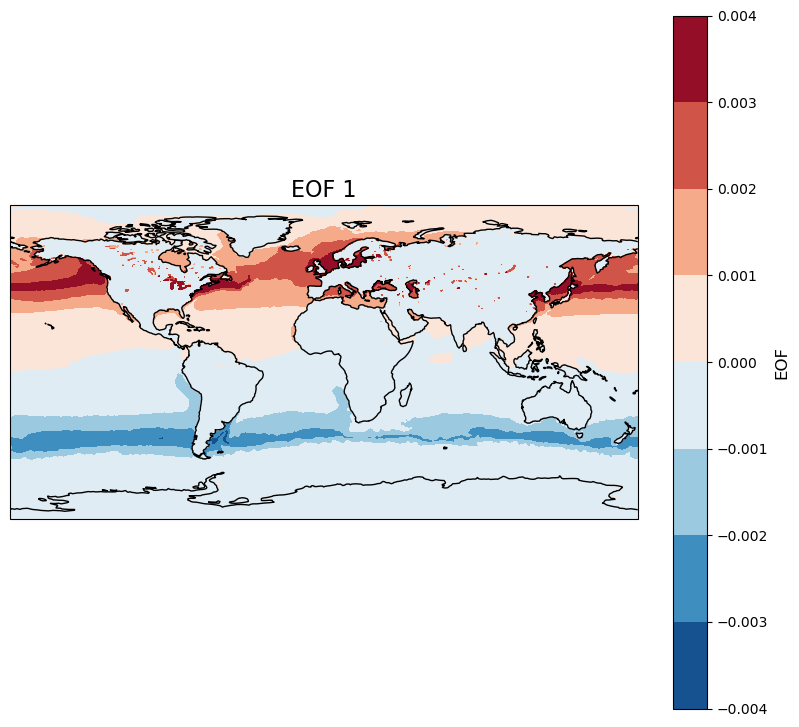

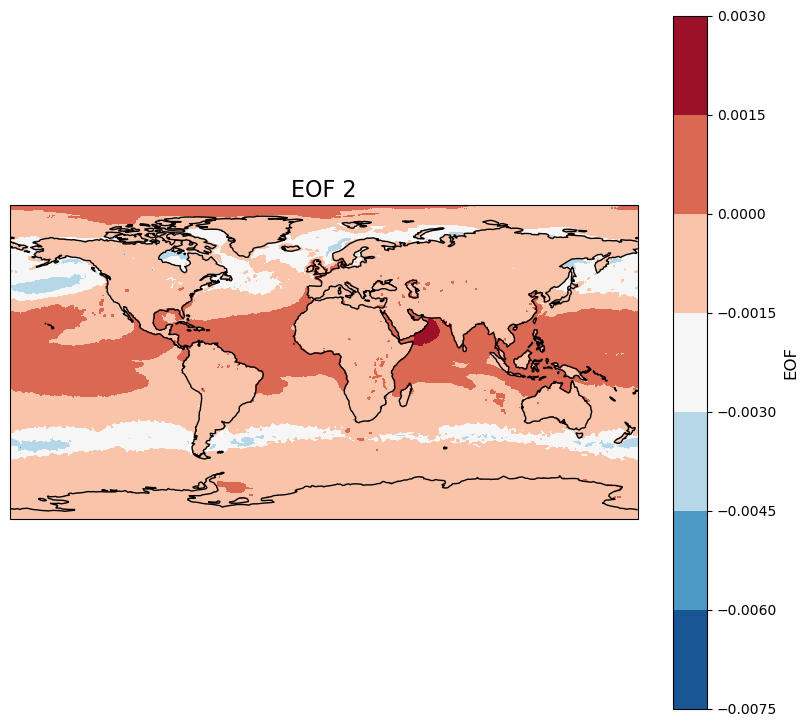

In [12]:
import numpy as np
import matplotlib.pyplot as plt
import cartopy.crs as ccrs

# Assuming you have latitude and longitude arrays
latitude = nc_data.variables['latitude'][:]
longitude = nc_data.variables['longitude'][:]

# Reshape each EOF to match the shape of the latitude and longitude grid
reshaped_eofs = eofs.reshape((240, len(latitude), len(longitude)))

# Plot each EOF
for i in range(2):
    fig = plt.figure(figsize=(9, 9))
    ax = fig.add_subplot(111, projection=ccrs.PlateCarree())
    ax.set_extent([longitude.min(), longitude.max(), latitude.min(), latitude.max()], crs=ccrs.PlateCarree())
    ax.coastlines()

    # Plot EOF
    cs = ax.contourf(longitude, latitude, reshaped_eofs[i], cmap='RdBu_r', transform=ccrs.PlateCarree())
    cbar = plt.colorbar(cs, ax=ax, orientation='vertical', fraction=0.05, pad=0.05)
    cbar.set_label('EOF', fontsize=12)
    ax.set_title('EOF ' + str(i+1), fontsize=16)

plt.show()


In [13]:
latitude.shape

(721,)

In [14]:
pc1 = pcs[0]
pc1

array([-3.91801014e+02, -1.04846915e+01,  2.97222206e+01, -4.04009011e+01,
        8.10393207e+01, -6.51589864e+00,  2.66364527e+01, -1.86494473e+01,
        2.81085287e+00, -1.98733940e+01,  6.07880951e+01, -2.71279617e+00,
        1.64635717e+01, -4.01210778e+00,  1.71178625e+01, -4.71718362e-01,
        2.00180498e+01, -1.79393854e+01,  2.13358873e+01, -2.39872138e+01,
        6.71425644e+00, -2.19149611e+01,  1.43442658e+01, -2.65251862e+01,
        4.81169284e+00, -8.19846147e+00,  5.81174418e+00, -6.09133932e+00,
        9.16104103e+00, -7.06303303e+00,  8.79531915e+00, -1.37599276e+01,
        3.71511410e+00,  2.11060593e+01, -2.68611036e+00,  6.15550220e+00,
       -1.10744989e+01, -2.01288214e+00,  1.05684482e+00,  5.80376024e+00,
        2.52952837e+00, -6.65726721e+00,  2.16809846e+01,  4.39847738e+00,
       -1.61739826e+00, -5.17081563e+00, -1.52294456e+01,  7.13201051e+00,
        1.21636385e+01, -4.91874286e+00, -2.47892921e+00, -5.96651707e+00,
       -2.27819595e+00,  

In [15]:
pc1.shape

(240,)

In [16]:
pc2 = pcs[1]
pc2

array([-5.03983167e+02, -5.14313394e+01, -4.17459703e+00, -3.05249071e+01,
        7.12345221e+01,  9.25772299e+00,  1.10568763e+00,  7.22132303e+00,
        1.97340339e+01, -3.72335710e+01,  4.42276159e+01, -2.55657645e+01,
        2.10016271e+01, -5.66323657e+00,  7.17258686e+00, -7.15345399e+00,
       -3.35588368e+00, -1.48873255e+01,  1.33171181e+01, -1.67867352e+01,
       -3.21478504e+00, -2.57244251e+01,  2.49658075e+01, -1.54223823e+01,
       -5.76602834e+00, -1.04828783e+00,  1.44813086e+01,  5.75402156e+00,
        6.98387424e+00, -6.79044840e+00,  2.03516452e+01, -1.24771437e+01,
        8.85348201e-01,  2.09896474e+01,  2.01628706e+00, -1.22794130e+01,
       -6.33862349e+00,  2.23742317e+00, -1.33780026e+00,  6.22068655e-01,
       -1.11688922e+01, -1.22386326e+01,  2.54007095e+01, -9.59002878e-01,
       -3.02860143e+00,  7.74495345e+00, -1.32058611e+01,  5.09865970e+00,
        1.39772110e+01, -6.99526977e+00, -7.11309390e+00, -2.80823419e+00,
       -4.87828106e+00,  

In [17]:
pc2.shape

(240,)

(2.182602490338731e-30, 0.8513191529237899)

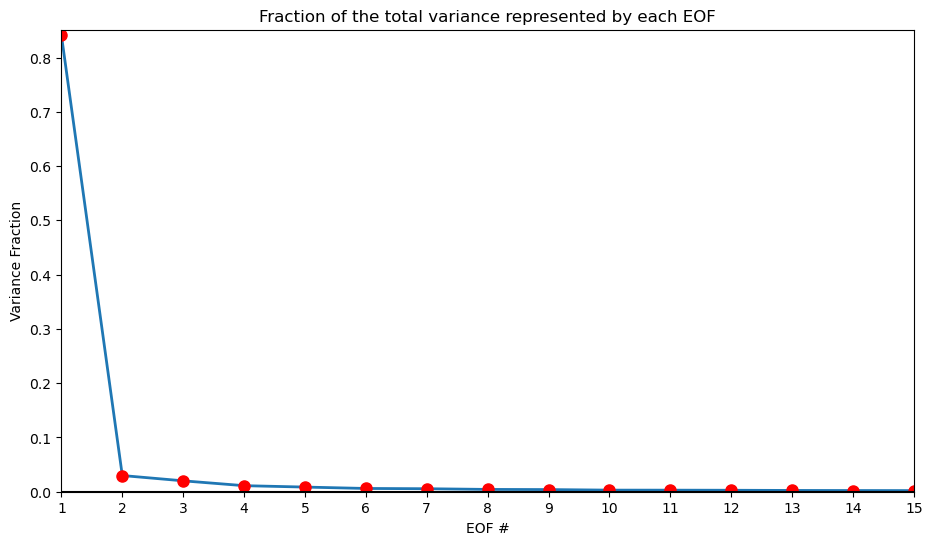

In [18]:
plt.figure(figsize=(11,6))
eof_num = range(1, 16)
plt.plot(eof_num, variance_fractions[0:15], linewidth=2)
plt.plot(eof_num, variance_fractions[0:15], linestyle='None', marker="o", color='r', markersize=8)
plt.axhline(0, color='k')
plt.xticks(range(1, 16))
plt.title('Fraction of the total variance represented by each EOF')
plt.xlabel('EOF #')
plt.ylabel('Variance Fraction')
plt.xlim(1, 15)
plt.ylim(np.min(variance_fractions), np.max(variance_fractions)+0.01)
